In [3]:
!git clone https://github.com/AshishJangra27/datasets

Cloning into 'datasets'...
remote: Enumerating objects: 306, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 306 (delta 11), reused 54 (delta 9), pack-reused 235
Receiving objects: 100% (306/306), 278.61 MiB | 15.17 MiB/s, done.
Resolving deltas: 100% (137/137), done.
Updating files: 100% (219/219), done.


In [26]:
import pandas as pd
from tqdm import tqdm


df = pd.read_csv('datasets/Gaana/songs.csv')
df.head()

,name,singer,singer_id,duration,link,language
0,Dil - E - Nadan Tujhe,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,05:00,/dil-e-nadan-tujhe-3,Urdu
1,Agar Hum Kahen Aur Woh Muskara De,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,06:26,/agar-hum-kahen-aur-woh-muskura-den,Urdu
2,Unke Dekhe Se,Jagjit Singh,/artist/jagjeet-singh-1,03:41,/unke-dekhe-se,Urdu
3,Yeh Na Thi Hamari Qismat - Chitra Singh,Chitra Singh,/artist/chitra-singh,04:26,/yeh-na-thi-hamari-qismat-2,Urdu
4,Hazaron Khwahishen Aisi,Jagjit Singh,/artist/jagjeet-singh-1,05:39,/hazaron-khwahishen-aisi-1,Urdu


### 1. Exploratory Data Analysis
#### 1.1) Checking the Null values

In [27]:
df.isnull().sum()

name         0
singer       0
singer_id    0
duration     0
link         0
language     0
dtype: int64

#### 1.2) Checking duplicate values

In [28]:
df = df.drop_duplicates()

In [29]:
df.head()

,name,singer,singer_id,duration,link,language
0,Dil - E - Nadan Tujhe,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,05:00,/dil-e-nadan-tujhe-3,Urdu
1,Agar Hum Kahen Aur Woh Muskara De,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,06:26,/agar-hum-kahen-aur-woh-muskura-den,Urdu
2,Unke Dekhe Se,Jagjit Singh,/artist/jagjeet-singh-1,03:41,/unke-dekhe-se,Urdu
3,Yeh Na Thi Hamari Qismat - Chitra Singh,Chitra Singh,/artist/chitra-singh,04:26,/yeh-na-thi-hamari-qismat-2,Urdu
4,Hazaron Khwahishen Aisi,Jagjit Singh,/artist/jagjeet-singh-1,05:39,/hazaron-khwahishen-aisi-1,Urdu


#### 1.3) Explore name column

In [30]:
print('Total  : ',len(df['name']))
print('Unique : ',df['name'].nunique())

Total  :  41354
Unique :  31534


#### 1.4) Explore singer column

In [31]:
print('Total  : ',len(df['singer']))
print('Unique : ',df['singer'].nunique())

Total  :  41354
Unique :  6196


- Split the singers by '|' operator

'S. P. Balasubrahmanyam|P. Susheela'

#### 1.5) Explore singer_id column

In [32]:
print('Total  : ',len(df['singer_id']))
print('Unique : ',df['singer_id'].nunique())

Total  :  41354
Unique :  6580


- Split the singer_id by '|' operator
- remove /artist/ frome very singer_id

#### 1.6) Explore duration column

In [33]:
print('Total  : ',len(df['duration']))
print('Unique : ',df['duration'].nunique())

Total  :  41354
Unique :  1309


- clean duration columna nd convert it into seconds

#### 1.7) Explore link column

In [34]:
print('Total  : ',len(df['link']))
print('Unique : ',df['link'].nunique())

Total  :  41354
Unique :  36361


In [35]:
df['link'].value_counts()

link
/kya-khoob-lagti-ho                   2
/chanda-chhore-chandni                2
/girdhari-chhed-muraliya-pyari        2
/jab-se-tumhen-dekha-hai              2
/dil-ka-bhanwar-kare-pukar-7          2
                                     ..
/shiva-ninnalli                       1
/hennu-aadidaga                       1
/jagadaadi-devatheya-prati-roopavo    1
/chandiye                             1
/tomar-je-oi-haater-mala              1
Name: count, Length: 36361, dtype: int64

In [36]:
df[df['link'] == '/jab-se-tumhen-dekha-hai']

,name,singer,singer_id,duration,link,language
21386,Jab Se Tumhein Dekha Hai,Asha Bhosle|Mohammed Rafi,/artist/asha-bhosle-1|/artist/mohammad-rafi,04:18,/jab-se-tumhen-dekha-hai,Hindi
26379,Jab Se Tumhein Dekha Hai,Asha Bhosle|Mohammed Rafi,/artist/asha-bhosle-1|/artist/mohammad-rafi,04:18,/jab-se-tumhen-dekha-hai,Old


- Deal with songs with duplicate link
- map them with suitable language

#### 1.8) Explore language column

In [37]:
print('Total  : ',len(df['language']))
print('Unique : ',df['language'].nunique())

Total  :  41354
Unique :  16


In [38]:
df['language'].unique()

array(['Urdu', 'Gujarati', 'Tamil', 'Kannada', 'Rajasthani', 'Haryanvi',
       'Punjabi', 'Hindi', 'Old', 'Malayalam', 'Marathi', 'Telugu',
       'Odia', 'Bhojpuri', 'Assamese', 'Bengali'], dtype=object)

In [39]:
df['language'].value_counts()

language
Telugu        4995
Hindi         4993
Old           4993
Marathi       4699
Tamil         4677
Punjabi       3818
Kannada       3559
Urdu          3116
Gujarati      2115
Bengali        958
Odia           940
Assamese       724
Rajasthani     541
Bhojpuri       519
Malayalam      479
Haryanvi       228
Name: count, dtype: int64

In [40]:
print('No of duplicate songs : ', len(df['link']) - df['link'].nunique())

No of duplicate songs :  4993


No of duplicate songs are equal to the number of songs in old category.

- Delete the old language category songs
- Check is number of unique songs(based on links) are equal to the total no of songs

### 2. Data Cleaning
#### 2.1) Remove the Duplicate values as per Language

In [41]:
df = df[df['language'] != 'Old'].reset_index()

df.head()

,index,name,singer,singer_id,duration,link,language
0,0,Dil - E - Nadan Tujhe,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,05:00,/dil-e-nadan-tujhe-3,Urdu
1,1,Agar Hum Kahen Aur Woh Muskara De,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,06:26,/agar-hum-kahen-aur-woh-muskura-den,Urdu
2,2,Unke Dekhe Se,Jagjit Singh,/artist/jagjeet-singh-1,03:41,/unke-dekhe-se,Urdu
3,3,Yeh Na Thi Hamari Qismat - Chitra Singh,Chitra Singh,/artist/chitra-singh,04:26,/yeh-na-thi-hamari-qismat-2,Urdu
4,4,Hazaron Khwahishen Aisi,Jagjit Singh,/artist/jagjeet-singh-1,05:39,/hazaron-khwahishen-aisi-1,Urdu


#### 2.2) Clean duration columna and convert it into seconds

In [42]:
durations = []

for i in df['duration']:

  lst = i.split(":")

  if (len(lst) == 2):
    durations.append(int(lst[0]) * 60 + int(lst[1]))

  else:
    durations.append(int(lst[0]) * 60 * 60 + int(lst[1]) * 60 + int(lst[2]))

df['duration'] = durations

#### 2.3) Clean singer_id column | removing /artist/ from every id and split them based on ,

In [43]:
df['singer_id'] = df['singer_id'].str.replace('/artist/','').str.replace('|',',')

#### 2.4) Clean singer column | split them based on ,

In [44]:
df['singer'] = df['singer'].str.replace('|',',')

#### 2.5) Clean link column | remove extra /

In [45]:
df['link'] = df['link'].str.replace("/",'')

### 3. Data Analysis

#### 3.1) Finding number of Unique Singers

In [46]:
lst = []

for i in df['singer_id']:
  lst.extend(i.split(','))

print('Number of unique singers : ', len(set(lst)))
print('Number of unique singers : ', df['singer_id'].str.split(',').explode().nunique())
print('Number of unique singers : ', len(list(set(','.join(df['singer_id']).split(',')))))

Number of unique singers :  4528
Number of unique singers :  4528
Number of unique singers :  4528


#### 3.2) Finding the TOP 10 Singers who is haivng maximum number of Songs

In [47]:
singers = list(set(lst))

singer_lst = []

for singer in tqdm(singers):            # Going thrugh every singer
  c = 0
  for i in df['singer_id']:       # Counting number of songs for each singer
    if (singer in i.split(',')):
      c += 1

  singer_lst.append([singer,c])

singer_df = pd.DataFrame(singer_lst, columns = ['singer','count'])

singer_df.sort_values(by = 'count', ascending = False).head(10)

singer_df.to_csv('singer_df.csv', index = False)

100%|██████████| 4528/4528 [01:04<00:00, 70.73it/s]


#### 3.3) Finding the Top 10 Longest Songs as per Duration

In [48]:
df.sort_values(by = 'duration', ascending = False).head(10)

,index,name,singer,singer_id,duration,link,language
16093,16093,Haye Tumba,Dilshad Akhtar,dilshad-akhtar,25680,haye-tumba,Punjabi
16352,16352,Bum Bum Lahiri,Dilshad Akhtar,dilshad-akhtar,24720,bum-bum-lahiri,Punjabi
15000,15000,Bum Bum Lahiri,Dilshad Akhtar,dilshad-akhtar,24720,bum-bum-lahiri-1,Punjabi
15025,15025,Kanu Atharu Bahoundi,Dilshad Akhtar,dilshad-akhtar,21840,kanu-atharu-bahoundi,Punjabi
14624,14624,Desi Bandri Vilayati Cheekan,Dilshad Akhtar,dilshad-akhtar,21780,desi-bandri-vilayati-cheekan-1,Punjabi
16022,16022,Desi Bandri Vilayati Cheekan,Dilshad Akhtar,dilshad-akhtar,21780,desi-bandri-vilayati-cheekan,Punjabi
15259,15259,Kunda Khol Basantariye,Dilshad Akhtar,dilshad-akhtar,21720,kunda-khol-basantariye,Punjabi
16027,16027,Ghund Kad Lai,Dilshad Akhtar,dilshad-akhtar,20880,ghund-kad-lai,Punjabi
14655,14655,Ghund Kad Lai,Dilshad Akhtar,dilshad-akhtar,20880,ghund-kad-lai-1,Punjabi
14360,14360,Man Wich Vasnai,Dilshad Akhtar,dilshad-akhtar,20580,man-wich-vasnai-1,Punjabi


#### 3.4) Finding the Punjabi Songs with duration between 3 to 4 minutes

In [49]:
df[(df['language'] == 'Punjabi') & (df['duration'] >= 180) & (df['duration'] <= 240)]


,index,name,singer,singer_id,duration,link,language
14236,14236,Pehle Lalkare Naal,"Amar Singh Chamkila,Amarjot","amar-singh-chamkila,amarjot",211,pehle-lalkare-naal-main-dar-gai,Punjabi
14244,14244,Dat Khol Mitra,"Amar Singh Chamkila,Amarjot","amar-singh-chamkila,amarjot",197,dat-khol-mitra,Punjabi
14245,14245,Bhul Gai Main Ghund Kadna,"Amar Singh Chamkila,Amarjot","amar-singh-chamkila,amarjot",214,bhul-gai-main-ghund-kadna,Punjabi
14246,14246,Bach Ke Reha Kar Tun Nakro,"Amar Singh Chamkila,Amarjot","amar-singh-chamkila,amarjot",239,bach-ke-reha-kar-tun-nakro,Punjabi
14247,14247,Kaali Teri Gut - Punjabi Geet,Asa Singh Mastana,asa-singh-mastana,181,kaali-teri-gut-punjabi-geet,Punjabi
...,...,...,...,...,...,...,...
18028,18028,"Tere Qadman Wich (From ""Balocha Daku"")",Tarannum Naz,tarannum-naz,233,tere-qadman-wich,Punjabi
18033,18033,Aaj Dumroo Bole,Nahid Akhtar,nahid-akhtar,232,aaj-dumroo-bole,Punjabi
18035,18035,Meri Uthdi Jawani,Nahid Akhtar,nahid-akhtar,184,meri-uthdi-jawani,Punjabi
18037,18037,Bol Bol We Dopatia,Nahid Akhtar,nahid-akhtar,238,bol-bol-we-dopatia,Punjabi


#### 3.5) Largest Collaboration in the history of Songs

In [50]:
df['singers'] = df['singer'].str.split(',').str.len()

df.sort_values(by = 'singers', ascending = False).head(10)

,index,name,singer,singer_id,duration,link,language,singers
36054,41048,Neel Kamal Lal Kamal - Thakurmaar Jhuli,"Asha Devi,Kazi Sabyasachi,Lalita Dhar Chowdhur...","asha-devi,kazi-sabyasachi,lalita-dhar-chowdhur...",1121,neel-kamal-laal-kamal,Bengali,25
16506,16506,Ungla Te Munde,"Karam Singh Bhatti,Sukhchain Kaur,Sarabji Jagt...","karam-singh-bhatti,sukhchain-kaur,sarabji-jagt...",173,ungla-te-munde,Punjabi,16
16124,16124,Mere Viah La Babla Ve,"Karam Singh Bhatti,Sukhchain Kaur,Sarabji Jagt...","karam-singh-bhatti,sukhchain-kaur,sarabji-jagt...",161,mere-viah-la-babla-ve,Punjabi,16
16069,16069,Charkhe Di Tand Warga,"Karam Singh Bhatti,Sukhchain Kaur,Sarabji Jagt...","karam-singh-bhatti,sukhchain-kaur,sarabji-jagt...",186,charkhe-di-tand-warga,Punjabi,16
14958,14958,Ag To Buja De Illo,"Karam Singh Bhatti,Sukhchain Kaur,Sarabji Jagt...","karam-singh-bhatti,sukhchain-kaur,sarabji-jagt...",166,ag-to-buja-de-illo,Punjabi,16
15668,15668,Main Akh Maari,"Karam Singh Bhatti,Sukhchain Kaur,Sarabji Jagt...","karam-singh-bhatti,sukhchain-kaur,sarabji-jagt...",146,main-akh-maari-1,Punjabi,16
15685,15685,Ley Chail Ve Mittra,"Karam Singh Bhatti,Sukhchain Kaur,Sarabji Jagt...","karam-singh-bhatti,sukhchain-kaur,sarabji-jagt...",132,ley-chail-ve-mittra,Punjabi,16
16026,16026,Saali Wekh Patole Vargi,"Karam Singh Bhatti,Sukhchain Kaur,Sarabji Jagt...","karam-singh-bhatti,sukhchain-kaur,sarabji-jagt...",205,saali-wekh-patole-vargi,Punjabi,16
15711,15711,Baaba Ho Laa Ke Bhabi Laa Ra,"Karam Singh Bhatti,Sukhchain Kaur,Sarabji Jagt...","karam-singh-bhatti,sukhchain-kaur,sarabji-jagt...",169,baaba-ho-laa-ke-bhabi-laa-ra,Punjabi,16
15882,15882,Chunni Thalle Ambiaan,"Karam Singh Bhatti,Sukhchain Kaur,Sarabji Jagt...","karam-singh-bhatti,sukhchain-kaur,sarabji-jagt...",151,chunni-thalle-ambiaan,Punjabi,16


In [51]:
df[df['language'] == 'Bengali'].sort_values(by = 'singers', ascending = False).head(10)

,index,name,singer,singer_id,duration,link,language,singers
36054,41048,Neel Kamal Lal Kamal - Thakurmaar Jhuli,"Asha Devi,Kazi Sabyasachi,Lalita Dhar Chowdhur...","asha-devi,kazi-sabyasachi,lalita-dhar-chowdhur...",1121,neel-kamal-laal-kamal,Bengali,25
36117,41111,Basanta (Part-1) With Recitation,"Arghya Sen,Banani Ghosh,Chinmoy Chatterjee,Dwi...","arghya-sen,banani-ghosh,chinmoy-chatterjee,dwi...",1475,basanta-part1,Bengali,15
36235,41229,Lord Bhanu (1 and 2)(Comic Sketch),"Basabi Ghatak,Bithi Ganguly,Chandidas Chakrabo...","basabi-ghatak,bithi-ganguly,chandidas-chakrabo...",784,lord-bhanu-1-2,Bengali,11
35980,40974,Bhanusingher Padavali (Drama),"Banani Ghosh,Bani Tagore,Bela Mukherjee,Kanika...","banani-ghosh,bani-tagore,bela-mukherjee,kanika...",1388,bhanusingher-padavali,Bengali,9
36307,41301,Bhanu Elo Kolkatay - 1 And 2 - Comic,"Sudhin Mukherjee,Sushil Das,Vivekananda Roy,Bh...","sudhin-mukherjee,sushil-das,vivekananda-roy,bh...",675,bhanu-elo-kolkatay-1-2,Bengali,6
35822,40816,Ghoomer,"Om Pawar,Shamim,Rehana Mirza,Shiv Ram,Master A...","om-pawar,shamim,rehana-mirza,shiv-ram,master-a...",206,ghoomer-1,Bengali,6
36017,41011,Ore Mon Ke Emon Daga,"Amit Kumar,Bhupinder Singh,Mohammed Rafi,Aarti...","amit-kumar,bhupinder-singh,mohammad-rafi,aarti...",674,ore-man-ke-amon,Bengali,4
36234,41228,Amanush - Dialogue - Maap Korben Huzur,"Abhhi Bhattacharya,Anil Chatterjee,Uttam Kumar...","abhhi-bhattacharya,anil-chatterjee,uttam-kumar...",1563,dialogues-and-song-1-amanush,Bengali,4
35755,40749,Eureka Eureka,"Kishore Kumar,Ranu Mukherjee,Chorus","kishore-kumar,ranu-mukherjee,chorus",210,eureka-eureka-1,Bengali,3
35466,40460,Kato Naree Achhe E Gokule,"Asha Bhosle,Kishore Kumar,Tanuja","asha-bhosle-1,kishore-kumar,tanuja",156,kato-naree-achhe-e-gokule,Bengali,3


In [72]:
df = df[df['singers'] <= 2]

In [73]:
df

,index,name,singer,singer_id,duration,link,language,singers
0,0,Dil - E - Nadan Tujhe,"Chitra Singh,Jagjit Singh","chitra-singh,jagjeet-singh-1",300,dil-e-nadan-tujhe-3,Urdu,2
1,1,Agar Hum Kahen Aur Woh Muskara De,"Chitra Singh,Jagjit Singh","chitra-singh,jagjeet-singh-1",386,agar-hum-kahen-aur-woh-muskura-den,Urdu,2
2,2,Unke Dekhe Se,Jagjit Singh,jagjeet-singh-1,221,unke-dekhe-se,Urdu,1
3,3,Yeh Na Thi Hamari Qismat - Chitra Singh,Chitra Singh,chitra-singh,266,yeh-na-thi-hamari-qismat-2,Urdu,1
4,4,Hazaron Khwahishen Aisi,Jagjit Singh,jagjeet-singh-1,339,hazaron-khwahishen-aisi-1,Urdu,1
...,...,...,...,...,...,...,...,...
36356,41350,Chaaridike Paaper Andhar (Manush Janam Diye Bi...,Kishore Kumar,kishore-kumar,203,chaaridike-paaper-andhar-manush-janam-diye-bidhi,Bengali,1
36357,41351,Ei Ki Go Shesh Daan,Feroza Begum,feroza-begum,236,ei-kigo-sesh-daan,Bengali,1
36358,41352,Ei Je Bangla,"Sandhya Mukherjee,Hemant Kumar","sandhya-mukherjee,hemanta-mukherjee",456,ei-je-bangla,Bengali,2
36359,41353,Jatone Hridaye Rekho,Ajoy Chakrabarty,ajoy-chakrabarty,269,jatone-hridaye-rekho,Bengali,1


In [75]:
df.groupby('singer').size().sort_values()

singer
Manhar Udhas,Chorus                  1
Rekha Jha,Vaidehi Thakur             1
Rekha Davjekar,Suman Kalyanpur       1
Rekha Bhardwaj                       1
Rehana Mirza,Mohan Singh Itawa       1
                                  ... 
S. Janaki                          728
Lata Mangeshkar                    856
P. Susheela                       1019
Asha Bhosle                       1037
S. P. Balasubrahmanyam            1151
Length: 5044, dtype: int64

In [76]:
df

,index,name,singer,singer_id,duration,link,language,singers
0,0,Dil - E - Nadan Tujhe,"Chitra Singh,Jagjit Singh","chitra-singh,jagjeet-singh-1",300,dil-e-nadan-tujhe-3,Urdu,2
1,1,Agar Hum Kahen Aur Woh Muskara De,"Chitra Singh,Jagjit Singh","chitra-singh,jagjeet-singh-1",386,agar-hum-kahen-aur-woh-muskura-den,Urdu,2
2,2,Unke Dekhe Se,Jagjit Singh,jagjeet-singh-1,221,unke-dekhe-se,Urdu,1
3,3,Yeh Na Thi Hamari Qismat - Chitra Singh,Chitra Singh,chitra-singh,266,yeh-na-thi-hamari-qismat-2,Urdu,1
4,4,Hazaron Khwahishen Aisi,Jagjit Singh,jagjeet-singh-1,339,hazaron-khwahishen-aisi-1,Urdu,1
...,...,...,...,...,...,...,...,...
36356,41350,Chaaridike Paaper Andhar (Manush Janam Diye Bi...,Kishore Kumar,kishore-kumar,203,chaaridike-paaper-andhar-manush-janam-diye-bidhi,Bengali,1
36357,41351,Ei Ki Go Shesh Daan,Feroza Begum,feroza-begum,236,ei-kigo-sesh-daan,Bengali,1
36358,41352,Ei Je Bangla,"Sandhya Mukherjee,Hemant Kumar","sandhya-mukherjee,hemanta-mukherjee",456,ei-je-bangla,Bengali,2
36359,41353,Jatone Hridaye Rekho,Ajoy Chakrabarty,ajoy-chakrabarty,269,jatone-hridaye-rekho,Bengali,1


In [66]:
df_jagjit_singh.groupby('language')['duration'].mean()

language
Gujarati    215.000000
Hindi       311.557692
Punjabi     309.925926
Urdu        275.900000
Name: duration, dtype: float64

In [71]:
df.groupby('language')['duration'].mean().sort_values(ascending = False).head()

language
Punjabi     448.317968
Urdu        410.692875
Bhojpuri    364.073218
Haryanvi    320.004386
Telugu      314.183584
Name: duration, dtype: float64

In [78]:
df['singer_id'].str.split(',')

0               [chitra-singh, jagjeet-singh-1]
1               [chitra-singh, jagjeet-singh-1]
2                             [jagjeet-singh-1]
3                                [chitra-singh]
4                             [jagjeet-singh-1]
                          ...                  
36356                           [kishore-kumar]
36357                            [feroza-begum]
36358    [sandhya-mukherjee, hemanta-mukherjee]
36359                        [ajoy-chakrabarty]
36360                           [asha-bhosle-1]
Name: singer_id, Length: 34672, dtype: object

In [81]:
df['singer_id'].str.split(',').explode().value_counts().sort_values(ascending = False).reset_index()

singer_id
s-p-balasubrahamanyam      3470
p-suseela-2                3077
s-janaki                   2096
asha-bhosle-1              1845
lata-mangeshkar            1665
                           ... 
krushna-chandra-mohanty       1
subasa-dash                   1
sreeram                       1
gopi-patnayak                 1
rabindranath-tagore           1
Name: count, Length: 3637, dtype: int64

In [86]:
singer_counts = df['singer_id'].str.split(',').explode().value_counts().sort_values(ascending = False).reset_index()
singer_counts.columns = ['singer','count']
singer_counts.head()

,singer,count
0,s-p-balasubrahamanyam,3470
1,p-suseela-2,3077
2,s-janaki,2096
3,asha-bhosle-1,1845
4,lata-mangeshkar,1665


<Axes: >

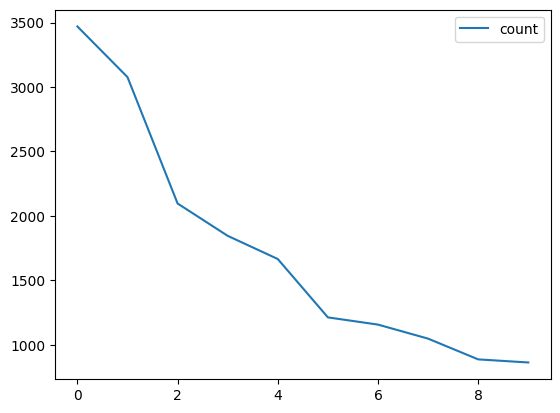

In [100]:
singer_counts.head(10).plot()

In [102]:
import zipfile

# Path to the zip file
zip_path = '/content/datasets/Job Postings/jobs.csv.zip'
# Destination directory
extract_path = '/content/datasets/Job Postings/'

# Unzipping the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("File unzipped successfully.")

File unzipped successfully.


### Award Show Questions

1. **Which singer should be given the lifetime achievement award?**
   - This can be determined by the singer with the most songs in the dataset.

2. **Which song has the longest duration and could be awarded the "Epic Song of the Year"?**
   - Identify the song with the longest duration.

3. **Which are the top 5 longest songs that could be nominated for the "Extended Play Excellence" award?**
   - List the top 5 songs based on duration.

4. **Which pairs of singers collaborate the most and could win the "Best Collaboration" award?**
   - Determine the most frequent singer collaborations.

5. **What are the most common words in song titles, and how can this influence the naming of special categories?**
   - Analyze the song titles for common words.